# Internship Assignment

The universal data complexity is defined for a data set as the Kolmogorov complexity of the mapping
enforced by the data set. It is closely related to several existing principles used in machine learning such
as Occam’s razor, the minimum description length, and the Bayesian approach. The data complexity
can also be defined based on a learning model, which is more realistic for applications. We demonstrate
the application of the data complexity in two learning problems, data decomposition and data pruning.
In data decomposition, we illustrate that a data set is best approximated by its principal subsets which
are Pareto optimal with respect to the complexity and the set size. In data pruning, we show that
outliers usually have high complexity contributions, and propose methods for estimating the complexity
contribution. Since in practice we have to approximate the ideal data complexity measures, we also
discuss the impact of such approximations.

# Importing libraries

In [2]:
import io
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading Data

In [4]:
df=pd.read_csv('intern_dataset.csv')
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


# Getting insight of data

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     912000 non-null  object 
 1   Signal1  912000 non-null  float64
 2   Signal2  912000 non-null  float64
 3   Label    912000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.9+ MB


In [7]:
df.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


# Data Preprocessing

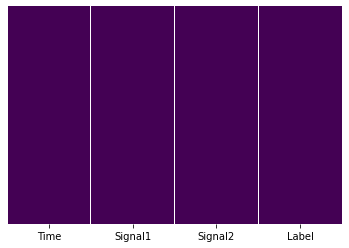

In [8]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [13]:
from sklearn.preprocessing import StandardScaler

# Visualizing Data

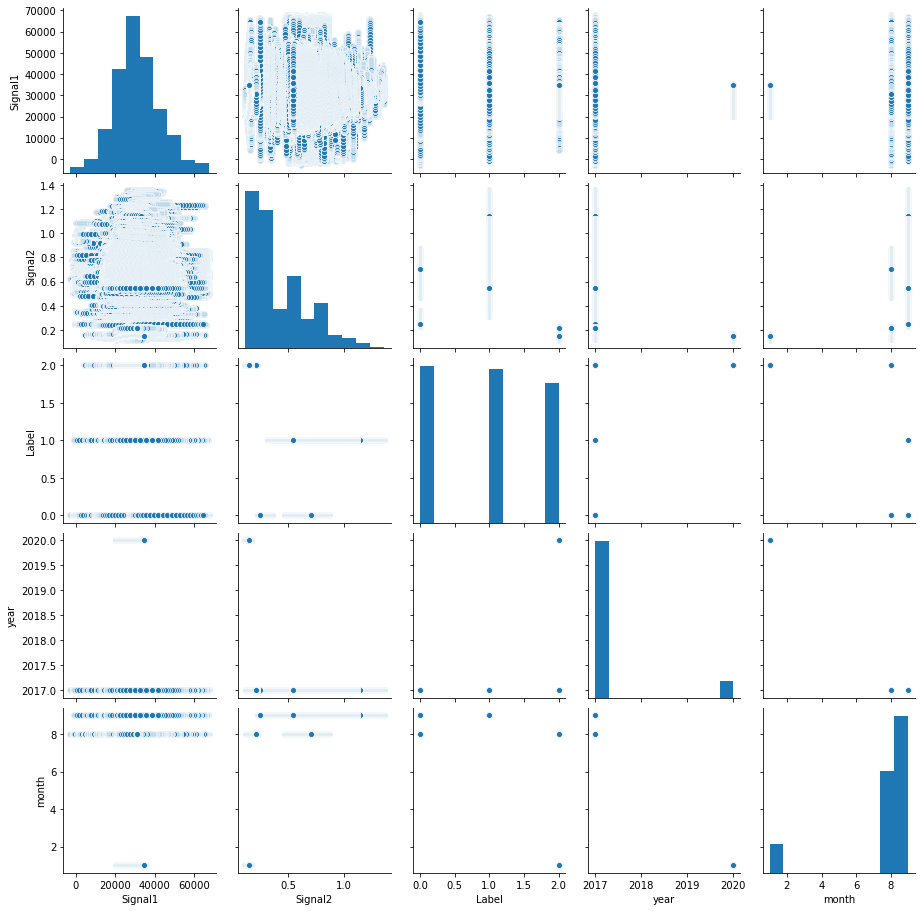

In [61]:
sns.pairplot(df)

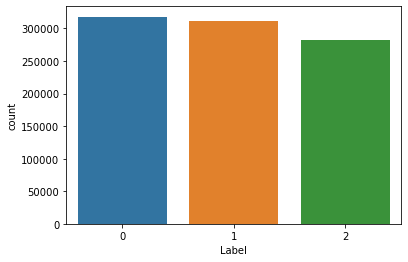

In [91]:
sns.countplot(x='Label',data=df)

Thus from the above visualization, we can see that it is a balanced Data set

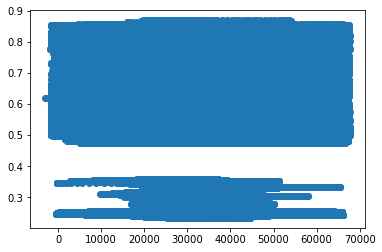

In [11]:
plt.scatter(data=df[df['Label']=='A'],x='Signal1',y='Signal2')

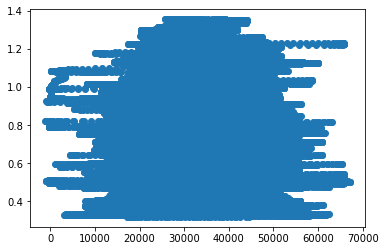

In [12]:
plt.scatter(data=df[df['Label']=='B'],x='Signal1',y='Signal2')

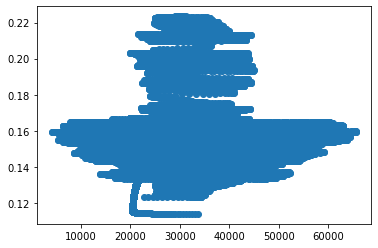

In [13]:
plt.scatter(data=df[df['Label']=='C'],x='Signal1',y='Signal2')

In [3]:
df['Label']=df['Label'].map({'A':0,'B':1,'C':2})

In [4]:
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,0
1,2017-08-14 11:37:49.801,32564.903040,0.856705,0
2,2017-08-14 11:37:49.811,31454.043305,0.856683,0
3,2017-08-14 11:37:49.821,30335.387166,0.856659,0
4,2017-08-14 11:37:49.831,29207.142938,0.856634,0


In [9]:
df['Time'].iloc[0]

'2017-08-14 11:37:49.791'

In [5]:
df['year'] = pd.DatetimeIndex(df['Time']).year
df['month'] = pd.DatetimeIndex(df['Time']).month
df.drop('Time',axis=1,inplace=True)
df.head()

,Signal1,Signal2,Label,year,month
0,33668.091913,0.856726,0,2017,8
1,32564.903040,0.856705,0,2017,8
2,31454.043305,0.856683,0,2017,8
3,30335.387166,0.856659,0,2017,8
4,29207.142938,0.856634,0,2017,8


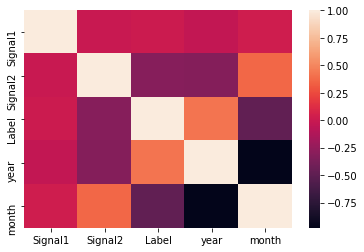

In [20]:
sns.heatmap(df.corr())

In [8]:
x=df.drop('Label',axis=1)
y=df['Label']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.01)

In [11]:
x_train.head()

,Signal1,Signal2,year,month
121647,52973.622516,0.484862,2017,8
628574,48593.436636,1.018411,2017,9
864854,30995.141132,0.161434,2020,1
859508,30499.219249,0.160539,2020,1
114906,14528.601257,0.480878,2017,8


In [14]:
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [15]:
x_train

array([[ 1.85097328,  0.33656195, -0.33098812,  0.06265475],
       [ 1.47660882,  2.40360898, -0.33098812,  0.49446494],
       [-0.02747722, -0.91644587,  3.0212565 , -2.96001652],
       ...,
       [-0.29451012, -0.91293837, -0.33098812,  0.06265475],
       [-0.12829572, -0.58243289, -0.33098812,  0.49446494],
       [ 0.62171174, -0.58127812, -0.33098812,  0.49446494]])

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Afhamfardeen98\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
predictions=model.predict(x_test)
predictions

array([2, 0, 1, ..., 2, 1, 0], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3243
           1       0.99      1.00      0.99      3092
           2       1.00      1.00      1.00      2785

    accuracy                           1.00      9120
   macro avg       1.00      1.00      1.00      9120
weighted avg       1.00      1.00      1.00      9120



In [21]:
print(confusion_matrix(y_test,predictions))

[[3206   37    0]
 [   0 3092    0]
 [   0    0 2785]]


As we can clearly see from the above confusion matrix that the model is wrongly predicting class 'A' the most, so we can say that class A is most complex amoung the three classes. 

In [ ]:
Name : Afham Fardeen
gmail : afhamfardeen98@gmail.com